In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

In [11]:
price = 'Oil' 
if price.lower() == 'oil':
    print('qoutayba')

qoutayba


#### The data can be found online under this link (with daily updates): 
- oil: https://www.nasdaq.com/market-activity/commodities/bz%3Anmx/historical
- gas: https://www.nasdaq.com/market-activity/commodities/ng%3Anmx/historical

## Data loading and data overview

In [8]:
price = 'Oil' 
if price.lower() == 'oil':
    stock_data = pd.read_csv( 'data/BZ-NMX_oil.csv') 
elif price.lower() == 'gas':
    stock_data = pd.read_csv( 'data/NG-NMX_gas.csv') 
else:
    raise Exception( 'Please specify stock-index of available data' )
print( '#########################################')
print( '#### First few rows of the dataframe ####')
print( stock_data.head())
print( '#### Last few rows of the dataframe  ####')
print( stock_data.tail() )
print( '#########################################')

#########################################
#### First few rows of the dataframe ####
         Date  Close/Last   Volume   Open   High    Low
0  10/21/2021       84.61  47081.0  85.88  86.12  83.36
1  10/20/2021       85.82  41281.0  85.10  85.89  83.63
2  10/19/2021       85.08  41887.0  84.11  85.40  83.71
3  10/18/2021       84.33  37176.0  85.05  86.03  83.96
4  10/15/2021       84.86  31221.0  84.20  85.10  84.17
#### Last few rows of the dataframe  ####
            Date  Close/Last  Volume    Open    High     Low
2552  10/28/2011      109.91  1035.0  110.42  110.99  109.78
2553  10/27/2011      112.08  1831.0  110.18  112.70  110.18
2554  10/26/2011      108.91  1730.0  110.57  110.92  108.83
2555  10/25/2011      110.92  1930.0  111.41  111.75  109.68
2556  10/24/2011      111.45   967.0  110.27  111.51  110.10
#########################################


### Process csv data to be usable for matplotlib

In [15]:
dates = np.array( stock_data['Date'])
print(dates.shape)
print(dates)
for i in range( len( dates) ):
    #regular expression for reformatting each string
    dates[i] = re.sub( '(\d*)\/(\d*)\/(\d*)', r'\3/\1/\2', dates[i]).replace('/','-' )
stock_data['Date'] = dates
print(stock_data['Date'])

(2557,)
['2021-10-21' '2021-10-20' '2021-10-19' ... '2011-10-26' '2011-10-25'
 '2011-10-24']
0       2021-10-21
1       2021-10-20
2       2021-10-19
3       2021-10-18
4       2021-10-15
           ...    
2552    2011-10-28
2553    2011-10-27
2554    2011-10-26
2555    2011-10-25
2556    2011-10-24
Name: Date, Length: 2557, dtype: object


### Plotting of data

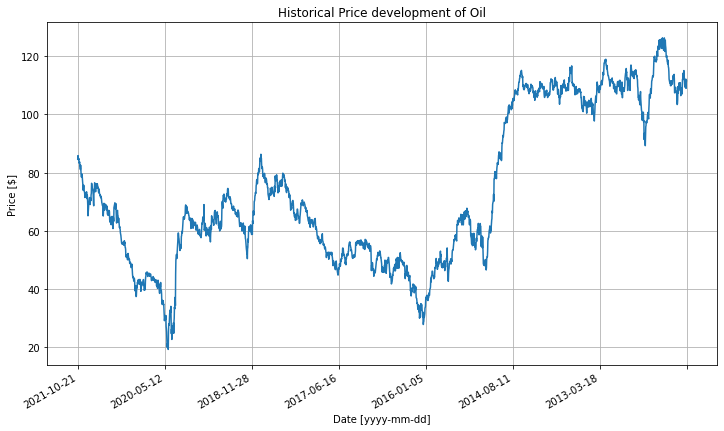

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot( stock_data['Date'], stock_data['Close/Last']) 

## Plot decorators
ax.xaxis.set_major_locator( mdates.AutoDateLocator())
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set( xlabel='Date [yyyy-mm-dd]', ylabel='Price [$]', 
        title='Historical Price development of {}'.format( price ) )
ax.grid()
plt.show()